In [1]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from calculator import calculate, load_data

In [2]:
sample_yaml_path = '3189-Cheviot-Vista-Pl-Los-Angeles-CA.yml'
c=load_data(sample_yaml_path)
c=calculate(c,is_print=True)

purchase_price 5995000
purchase_closing_cost 1500
estimated_repair_cost 20000
total_project_cost 6016500
down_payment_dollar 1199000
loan_amount 4794500
point_charged_by_lender 0
monthly_line_of_credit_payment 6409
monthly_mortgage_payment 21529
total_cash_needed 1221500
monthly_income 29790
monthly_expenses 49338
monthly_cashflow -19548
net_operating_income 100683
purchase_cap_rate_prct 1.68


In [3]:
sample_yaml_path = '3189-Cheviot-Vista-Pl-Los-Angeles-CA.yml'
c=load_data(sample_yaml_path)
# all cash
del c.line_of_credit
c.down_payment_of_purchase_price = 1
c=calculate(c,is_print=True)

purchase_price 5995000
purchase_closing_cost 1500
estimated_repair_cost 20000
total_project_cost 6016500
down_payment_dollar 5995000
loan_amount 0
point_charged_by_lender 0
monthly_line_of_credit_payment 0
monthly_mortgage_payment 0
total_cash_needed 6017500
monthly_income 29790
monthly_expenses 21400
monthly_cashflow 8390
net_operating_income 100682
purchase_cap_rate_prct 1.68


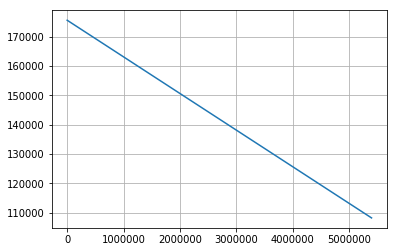

In [4]:
sample_yaml_path = '3189-Cheviot-Vista-Pl-Los-Angeles-CA.yml'
c=load_data(sample_yaml_path)
c=calculate(c,is_print=False)
x = []
y = []
for _ in range(300):
    c.purchase_price*= 0.9
    c=calculate(c,is_print=False)
    x.append(c.purchase_price)
    y.append(c.net_operating_income)
plt.plot(x,y)
plt.grid(True)

In [5]:
#import requests
#url = 'https://www.loopnet.com/Listing/1311-19th-St-Santa-Monica-CA/14010784/'
#r = requests.get(url)

In [6]:
import pandas as pd
df = pd.read_csv('redfin_2019-01-01-13-50-07.csv')
df.describe()

,ZIP,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,LATITUDE,LONGITUDE
count,51.0,5.100000e+01,49.000000,49.000000,41.000000,43.000000,49.000000,39.000000,41.000000,0.0,0.0,0.0,51.000000,51.000000
mean,90034.0,2.984876e+06,11.653061,10.612245,6673.170732,7876.744186,1956.489796,186.384615,545.756098,NaN,NaN,NaN,34.029686,-118.396194
std,0.0,2.761392e+06,11.033190,11.261691,6918.498200,4838.755719,15.869418,152.739650,283.833206,NaN,NaN,NaN,0.007057,0.012940
min,90034.0,7.000000e+05,1.000000,1.000000,812.000000,2064.000000,1924.000000,14.000000,234.000000,NaN,NaN,NaN,34.015611,-118.421924
25%,90034.0,1.370000e+06,4.000000,4.000000,2574.000000,5024.500000,1949.000000,89.000000,380.000000,NaN,NaN,NaN,34.025127,-118.405582
50%,90034.0,2.100000e+06,8.000000,7.000000,4378.000000,6850.000000,1958.000000,146.000000,462.000000,NaN,NaN,NaN,34.030968,-118.396456
75%,90034.0,3.277500e+06,14.000000,12.000000,7598.000000,8519.000000,1964.000000,236.000000,588.000000,NaN,NaN,NaN,34.033901,-118.386170
max,90034.0,1.565000e+07,48.000000,52.000000,34471.000000,30000.000000,2006.000000,827.000000,1661.000000,NaN,NaN,NaN,34.042846,-118.372582


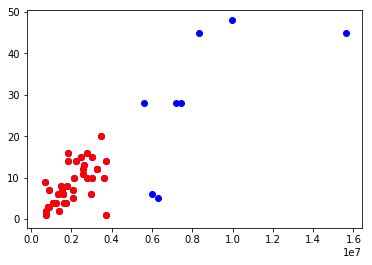

In [7]:
df = pd.read_csv('redfin_2019-01-01-13-50-07.csv')
plt.scatter(df['PRICE'],df['BEDS'],color='blue')
df = df[df['PRICE']<5000000]
plt.scatter(df['PRICE'],df['BEDS'],color='red')

In [8]:
src='URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)'
tgt='URL'
df=df.rename(index=str, columns={src:tgt})
df['c']=None
df['purchase_cap_rate_prct']=None
df['net_operating_income']=None
df['monthly_cashflow']=None
c=load_data('zero_down.yml')
for n,row in df.iterrows():
    c.purchase_price=row['PRICE']
    c.total_gross_monthly_rent=row['BEDS']*1500
    c=calculate(c,is_print=False)
    df.at[n, 'c'] = c
    df.at[n,'purchase_cap_rate_prct']=c.purchase_cap_rate_prct
    df.at[n,'net_operating_income']=c.net_operating_income
    df.at[n,'monthly_cashflow'] = c.monthly_cashflow

In [9]:
to_pop=[
    'SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE',
    'ZIP', 'LOCATION', 'SQUARE FEET', 'LOT SIZE',
    'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS',
    'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 
    'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE',
]
for k in to_pop:
    df.pop(k)


In [12]:
for n,row in df.sort_values(by=['monthly_cashflow', 'net_operating_income'],ascending=False).iterrows():
    print(row['URL'])
    del row['c']
    del row['URL']
    print(row)
    print(''.join(['-' for _ in range(50)]))

http://www.redfin.com/CA/Los-Angeles/3720-Vinton-Ave-90034/home/6794422
PRICE                      700000
BEDS                            9
BATHS                          10
purchase_cap_rate_prct       9.88
net_operating_income        69160
monthly_cashflow          2428.59
Name: 40, dtype: object
--------------------------------------------------
http://www.redfin.com/CA/Los-Angeles/1975-S-Garth-Ave-90034/home/6786992
PRICE                     1860000
BEDS                           16
BATHS                          11
purchase_cap_rate_prct    6.32581
net_operating_income       117660
monthly_cashflow          932.237
Name: 12, dtype: object
--------------------------------------------------
http://www.redfin.com/CA/Los-Angeles/5841-Ernest-Ave-90034/home/6901957
PRICE                      900000
BEDS                            7
BATHS                           4
purchase_cap_rate_prct    5.40667
net_operating_income        48660
monthly_cashflow         -234.576
Name: 16, dtype: obje